# Diamonds Price Prediction Project

### Importing relevant libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Relevant information

#### Files

- data.csv: training set
- test.csv: test set
- sample_submission.csv: sample submission

#### Features

- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

### Importing the training csv

In [2]:
#Importing the csv to Jupyter Notebook
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [3]:
#Checking the shape of the dataframe
training_df.shape

(40345, 11)

(40345, 11)

(40345, 11)

In [4]:
#Checking if there are missing values
training_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
# set the id column as index
training_df.set_index('id', inplace=True)

In [6]:
training_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [7]:
#Check what are the values that could be 
for col in training_df.columns:
    print(f"**** {col} **** --> {training_df[col].unique()}")

**** carat **** --> [0.78 0.31 0.3  1.04 0.65 0.9  0.71 2.05 1.1  1.19 0.33 1.3  1.29 0.69
 0.28 1.4  1.01 0.5  1.5  1.03 1.51 0.76 1.21 0.74 0.32 0.59 1.02 2.01
 0.91 0.43 0.23 0.52 0.34 2.   1.7  0.35 0.8  0.4  1.32 0.54 0.42 1.
 0.41 0.51 0.26 0.93 1.07 0.7  0.55 0.82 2.28 1.56 0.79 1.24 0.57 2.02
 0.63 0.72 1.09 1.06 0.36 0.61 0.25 1.45 1.52 1.6  0.56 1.05 1.2  1.31
 1.11 0.77 0.38 1.13 1.53 2.31 1.61 1.75 1.18 0.64 1.12 1.22 1.76 1.25
 1.17 1.71 1.14 0.37 1.27 0.48 1.44 0.73 1.23 0.53 1.33 0.27 1.54 0.62
 1.41 1.43 1.35 0.29 1.84 3.51 2.21 0.46 1.59 2.11 1.26 2.08 2.23 2.12
 2.09 0.39 0.92 1.16 1.64 0.83 2.35 0.44 0.49 1.63 0.58 2.32 1.57 1.74
 1.15 1.82 1.34 2.15 2.52 1.72 2.03 2.18 1.95 0.24 0.75 0.45 2.25 1.66
 0.85 1.62 0.47 0.81 2.2  3.   1.58 0.89 2.24 1.65 1.28 1.38 0.6  1.83
 1.73 0.66 0.96 1.79 2.04 0.95 2.1  0.84 1.08 1.55 0.99 0.94 2.06 0.87
 2.19 2.51 2.68 0.67 2.44 0.97 2.26 0.98 1.46 2.07 3.65 0.22 0.21 2.53
 2.29 1.86 1.37 2.13 2.14 1.9  3.01 2.39 2.27 1.39 0.2  2.5

**** carat **** --> [0.78 0.31 0.3  1.04 0.65 0.9  0.71 2.05 1.1  1.19 0.33 1.3  1.29 0.69
 0.28 1.4  1.01 0.5  1.5  1.03 1.51 0.76 1.21 0.74 0.32 0.59 1.02 2.01
 0.91 0.43 0.23 0.52 0.34 2.   1.7  0.35 0.8  0.4  1.32 0.54 0.42 1.
 0.41 0.51 0.26 0.93 1.07 0.7  0.55 0.82 2.28 1.56 0.79 1.24 0.57 2.02
 0.63 0.72 1.09 1.06 0.36 0.61 0.25 1.45 1.52 1.6  0.56 1.05 1.2  1.31
 1.11 0.77 0.38 1.13 1.53 2.31 1.61 1.75 1.18 0.64 1.12 1.22 1.76 1.25
 1.17 1.71 1.14 0.37 1.27 0.48 1.44 0.73 1.23 0.53 1.33 0.27 1.54 0.62
 1.41 1.43 1.35 0.29 1.84 3.51 2.21 0.46 1.59 2.11 1.26 2.08 2.23 2.12
 2.09 0.39 0.92 1.16 1.64 0.83 2.35 0.44 0.49 1.63 0.58 2.32 1.57 1.74
 1.15 1.82 1.34 2.15 2.52 1.72 2.03 2.18 1.95 0.24 0.75 0.45 2.25 1.66
 0.85 1.62 0.47 0.81 2.2  3.   1.58 0.89 2.24 1.65 1.28 1.38 0.6  1.83
 1.73 0.66 0.96 1.79 2.04 0.95 2.1  0.84 1.08 1.55 0.99 0.94 2.06 0.87
 2.19 2.51 2.68 0.67 2.44 0.97 2.26 0.98 1.46 2.07 3.65 0.22 0.21 2.53
 2.29 1.86 1.37 2.13 2.14 1.9  3.01 2.39 2.27 1.39 0.2  2.5

**** carat **** --> [0.78 0.31 0.3  1.04 0.65 0.9  0.71 2.05 1.1  1.19 0.33 1.3  1.29 0.69
 0.28 1.4  1.01 0.5  1.5  1.03 1.51 0.76 1.21 0.74 0.32 0.59 1.02 2.01
 0.91 0.43 0.23 0.52 0.34 2.   1.7  0.35 0.8  0.4  1.32 0.54 0.42 1.
 0.41 0.51 0.26 0.93 1.07 0.7  0.55 0.82 2.28 1.56 0.79 1.24 0.57 2.02
 0.63 0.72 1.09 1.06 0.36 0.61 0.25 1.45 1.52 1.6  0.56 1.05 1.2  1.31
 1.11 0.77 0.38 1.13 1.53 2.31 1.61 1.75 1.18 0.64 1.12 1.22 1.76 1.25
 1.17 1.71 1.14 0.37 1.27 0.48 1.44 0.73 1.23 0.53 1.33 0.27 1.54 0.62
 1.41 1.43 1.35 0.29 1.84 3.51 2.21 0.46 1.59 2.11 1.26 2.08 2.23 2.12
 2.09 0.39 0.92 1.16 1.64 0.83 2.35 0.44 0.49 1.63 0.58 2.32 1.57 1.74
 1.15 1.82 1.34 2.15 2.52 1.72 2.03 2.18 1.95 0.24 0.75 0.45 2.25 1.66
 0.85 1.62 0.47 0.81 2.2  3.   1.58 0.89 2.24 1.65 1.28 1.38 0.6  1.83
 1.73 0.66 0.96 1.79 2.04 0.95 2.1  0.84 1.08 1.55 0.99 0.94 2.06 0.87
 2.19 2.51 2.68 0.67 2.44 0.97 2.26 0.98 1.46 2.07 3.65 0.22 0.21 2.53
 2.29 1.86 1.37 2.13 2.14 1.9  3.01 2.39 2.27 1.39 0.2  2.5

### CONCLUSIONES

Después de ver los valores únicos de cada una de las columnas, se procederá como :

- Columna *'cut'*: Cada valor tiene una importancia, por lo que se va a proceder a reemplazar los valores por números.

- Columna *'color'*: A priori, ningún color tiene más importancia que otro, por lo que se usará la función get_dummies para conseguir que todos los valores tengan la misma importancia.

- Columna *'clarity'*: Cada valor tiene una importancia, por lo que se va a proceder a reemplazar los valores por números.

#### Columna *'cut'*

In [8]:
# List of values from 'cut' column
cuts_column=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [9]:
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(cuts_column):
    print(f"The value '{y}' now is {x}")
    training_df['cut'] = training_df['cut'].replace(y, x)

The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4
The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4
The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4


In [10]:
training_df['cut'].unique()

array([3, 4, 2, 0, 1])

array([3, 4, 2, 0, 1])

array([3, 4, 2, 0, 1])

#### Columna *'clarity'*

In [11]:
# List of values from 'clarity' column
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [12]:
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    training_df['clarity'] = training_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7
The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7
The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


In [13]:
training_df['clarity'].unique()

array([4, 2, 5, 1, 3, 7, 6, 0])

array([4, 2, 5, 1, 3, 7, 6, 0])

array([4, 2, 5, 1, 3, 7, 6, 0])

#### Columna *'color'*

In [14]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']

In [15]:
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    training_df['color'] = training_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6
The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6
The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


In [16]:
training_df['color'].unique()

array([4, 6, 5, 0, 2, 1, 3])

array([4, 6, 5, 0, 2, 1, 3])

array([4, 6, 5, 0, 2, 1, 3])

In [17]:
training_df.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475


## Cuáles son las columnas con más relación?

In [18]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
corr = training_df.corr()

In [20]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

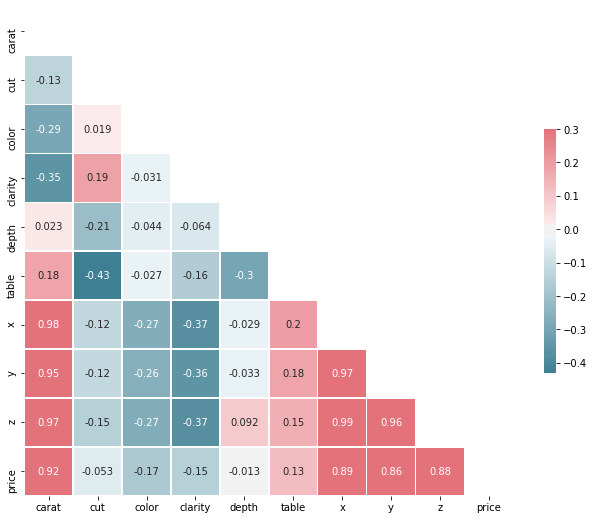

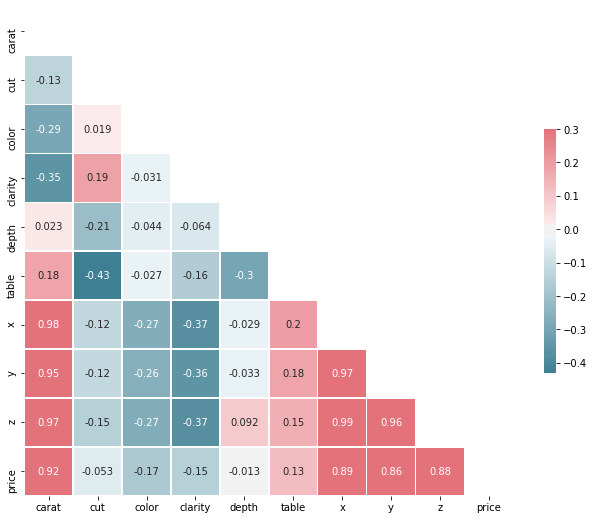

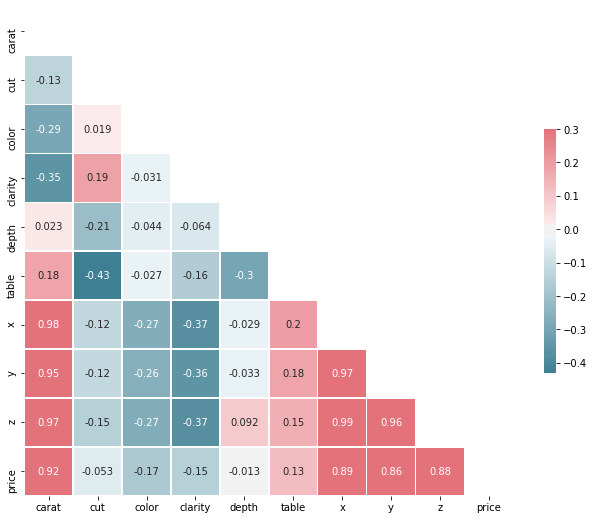

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

## Normalizing and Standardizing the data

In [22]:
# Original Data
X = training_df.drop(columns=["price"])
y = training_df['price']

In [23]:
# Standarized & Normalized "X"
pipeline = [StandardScaler()]
tr = make_pipeline(*pipeline)
Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr,columns = X.columns)

In [24]:
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)'''

X_train, X_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 9) (8069, 9) (32276,) (8069,)
(32276, 9) (8069, 9) (32276,) (8069,)
(32276, 9) (8069, 9) (32276,) (8069,)


In [25]:
result = pd.concat([Xpr, y], axis=1, sort=False)

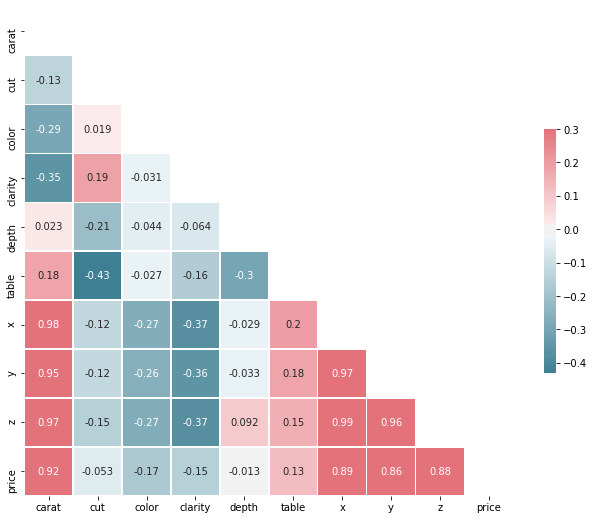

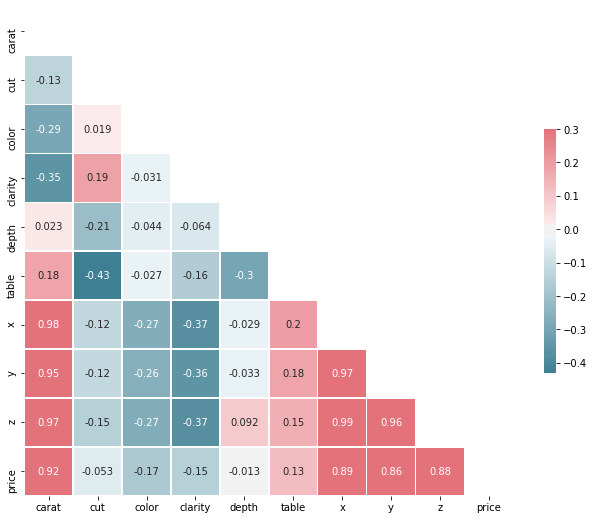

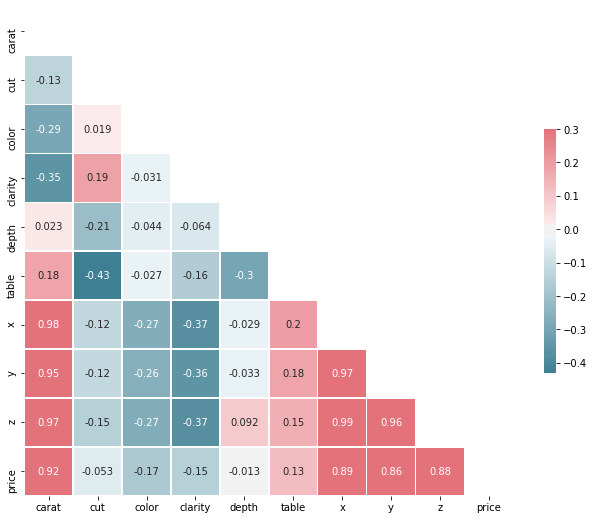

In [26]:
corr = result.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [27]:
X_corr = Xpr[['carat','table','x','y','z']]
y_corr = y

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 5) (8069, 5) (32276,) (8069,)
(32276, 5) (8069, 5) (32276,) (8069,)
(32276, 5) (8069, 5) (32276,) (8069,)


## Using the selector

In order to check if the relevant columns are the same:

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=2, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5)

In [ ]:
selector.fit(Xpr, y)

In [ ]:
selector.n_features_

In [ ]:
pd.Series(Xpr.columns)[selector.support_.tolist()]

####  Model training

In [ ]:
list(training_df.columns)

In [ ]:
X_training = result[['carat','cut','color','clarity']]
y_training = result['price']

In [ ]:
X_training

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_training, y_training, test_size=0.2, random_state=42)

In [ ]:
rf_reg.fit(X_train1, y_train1)

In [ ]:
rf_reg.feature_importances_

In [ ]:
print(rf_reg.score(X_train1, y_train1))
print(rf_reg.score(X_test1, y_test1))

In [ ]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test1, rf_reg.predict(X_test1)))
print('RMSE', np.sqrt(mean_squared_error(y_test1, rf_reg.predict(X_test1))))
print('MSLE', mean_squared_log_error(y_test1, rf_reg.predict(X_test1)))
print('MAE', mean_absolute_error(y_test1, rf_reg.predict(X_test1)))
print('R2', r2_score(y_test1, rf_reg.predict(X_test1)))